In [2]:
# import basic package
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
 os.getcwd()

'C:\\Users\\PTC\\Desktop\\anaconda ML\\Time Series Analysis And Forecasting'

In [4]:
# import dataset
dataset = pd.read_csv('airline_passengers.csv')
dataset

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
# yyyy-mm-dd format to predict passenger travelling monthwise
# import package

from datetime import datetime

In [6]:
dataset['Month'] = pd.to_datetime(dataset['Month'])

In [7]:
dataset.head()

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
# set month as index value

dataset.set_index('Month', inplace=True)
dataset.head()
    
    

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


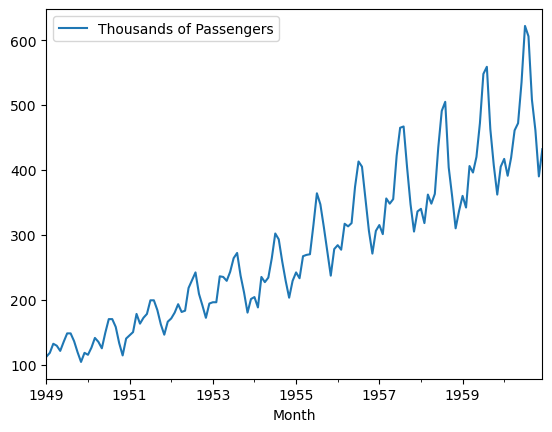

In [9]:
dataset.plot()
plt.show()

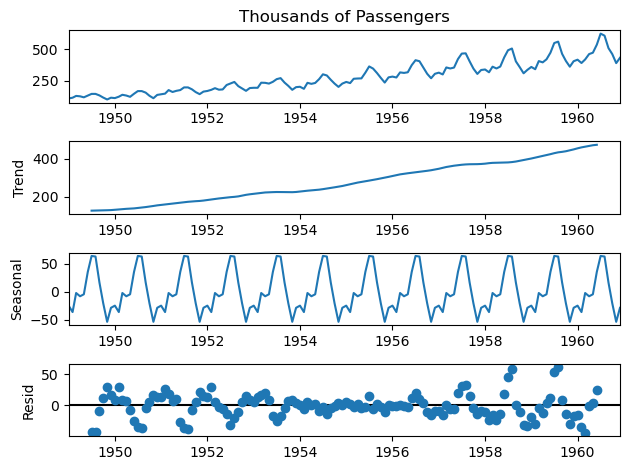

In [10]:
## Decomposition to check dataset component
from statsmodels.tsa.seasonal import seasonal_decompose
decompostion = seasonal_decompose(dataset['Thousands of Passengers'], period=12)
decompostion.plot()
plt.show()

In [11]:
## Resid ( residulal) - unpatten daata (error data)

In [12]:
# to check whether my data is stationary or non-stationary
# chechk name - "Augmented Dickey Fuller Test" - this is mandatory steps in ML model
    
from statsmodels.tsa.stattools import adfuller

In [13]:
adfuller(dataset['Thousands of Passengers'])

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [14]:
# 0.991880 - P value

In [15]:
def adf_check(timeseries):
    result = adfuller(timeseries)
    print('Augmented Dickey Fuller Test - Stationary or Non-Staionary')
    labels = ['ADF Test Statistics' , 'p-value' , '#Lags' , 'No of Obs']
    
    for a , b in zip(result, labels):
        print(b + " : "+ str(a))
        
    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my timeseries is stationary")
    else:
        print("Week evidence against null hypothesis and my timeseries in Non-Stationary")

In [16]:
adf_check(dataset['Thousands of Passengers'])

Augmented Dickey Fuller Test - Stationary or Non-Staionary
ADF Test Statistics : 0.8153688792060423
p-value : 0.9918802434376409
#Lags : 13
No of Obs : 130
Week evidence against null hypothesis and my timeseries in Non-Stationary


In [17]:
#### Remember - you can build time series model only when your data is stationary
#### We are geting non-stationary data so we have to make our data stationary first
#### how we can do it - by the help of log function 

In [18]:
dataset['1st Diff'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(1)

In [19]:
dataset.head(10)

,Thousands of Passengers,1st Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0
1949-07-01,148,13.0
1949-08-01,148,0.0
1949-09-01,136,-12.0


In [20]:
adf_check(dataset['1st Diff'].dropna())

Augmented Dickey Fuller Test - Stationary or Non-Staionary
ADF Test Statistics : -2.8292668241699874
p-value : 0.05421329028382711
#Lags : 12
No of Obs : 130
Week evidence against null hypothesis and my timeseries in Non-Stationary


In [21]:
dataset['2nd Diff'] = dataset['1st Diff'] - dataset['1st Diff'].shift(1)

In [22]:
dataset.head(10)

,Thousands of Passengers,1st Diff,2nd Diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0
1949-07-01,148,13.0,-1.0
1949-08-01,148,0.0,-13.0
1949-09-01,136,-12.0,-12.0


In [23]:
adf_check(dataset['2nd Diff'].dropna())

Augmented Dickey Fuller Test - Stationary or Non-Staionary
ADF Test Statistics : -16.384231542468513
p-value : 2.7328918500142026e-29
#Lags : 11
No of Obs : 130
Strong evidence against null hypothesis and my timeseries is stationary


## Now my time series data is stationary

#### AIC = -2LL+2K
#### K = parameter
#### Parameter = trend ( p d q)/ seasonality ( P D Q)

## D /d = difference - Intergrated

### Trend 
#### d =2
#### p = ?
#### q = ?

## seasonality
## P D Q = ? ,? , ?

## ARIMA = AutoRegressive INtergrated Moving Avg
#### AR - P/p
#### I - D/d
#### MA - Q/q



In [24]:
# Create a seasonality
dataset['seasonality'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(12)

In [25]:
dataset.head(20)

,Thousands of Passengers,1st Diff,2nd Diff,seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


In [26]:
adf_check(dataset['seasonality'].dropna())

Augmented Dickey Fuller Test - Stationary or Non-Staionary
ADF Test Statistics : -3.3830207264924805
p-value : 0.011551493085514982
#Lags : 1
No of Obs : 130
Strong evidence against null hypothesis and my timeseries is stationary


In [27]:
# To find P/p and Q/q vqlue

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


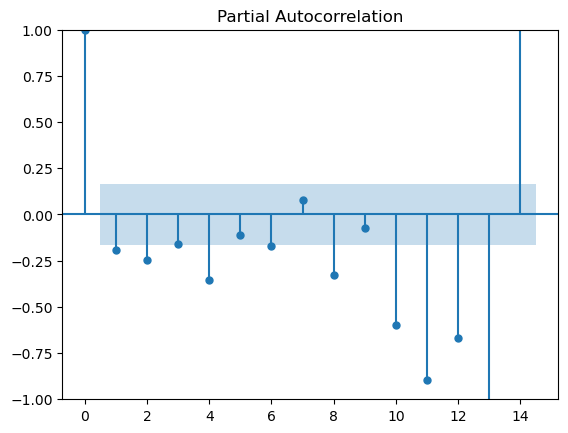

In [28]:
# Trend : d=2, p = ? and q=?
# to find p value
plot_pacf(dataset['2nd Diff'].dropna(), lags= 14)
plt.show()

## Trend : d = 2 , p = 2 and q = ?

## Correlation : 
##### 1) -0.2 tp +0.2 - neutral/no correlation.
##### 2) -0.2 to -0.6 and 0.2 to 0.6 - Week correlation
##### 3) -0.6 to -1 and 0.6 to 1 - strong correlation

## note - +ve sign mens directly propotional and -ve sign mens inversally propotional
## shadded part mens no correlation 
## the time we get no correlation , we stop chechking then 

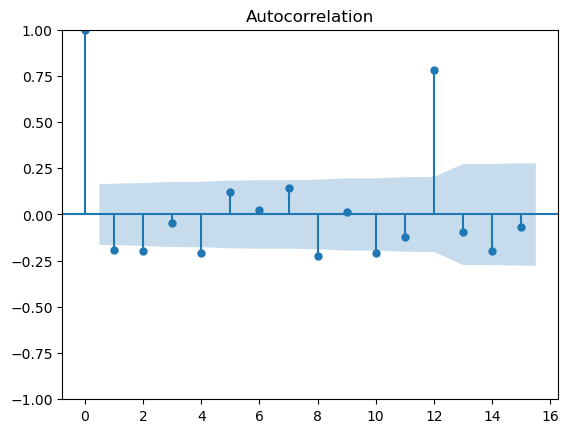

In [29]:
# to find q value
plot_acf(dataset['2nd Diff'].dropna(), lags= 15)
plt.show()

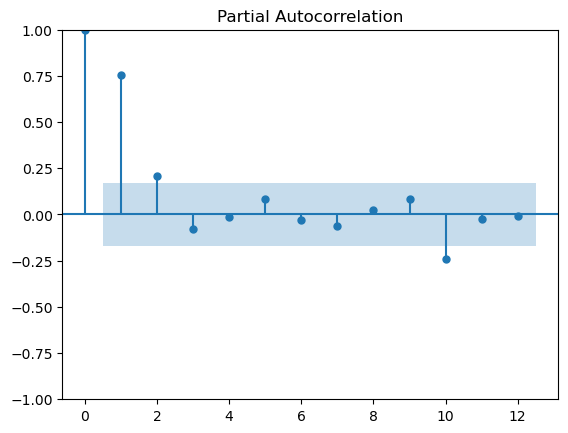

In [30]:
# For seasonality
# to find P value
plot_pacf(dataset['seasonality'].dropna(), lags= 12)
plt.show()

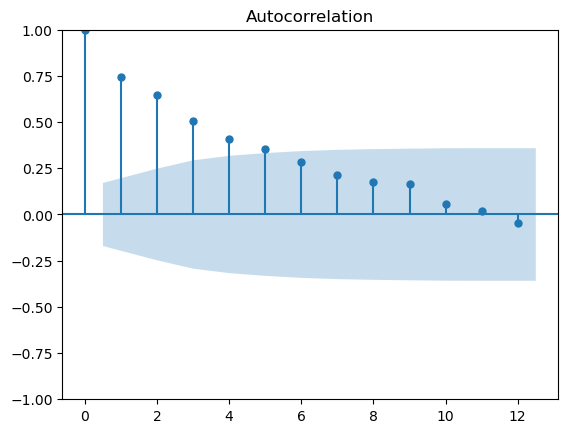

In [31]:
# to find Q value 
plot_acf(dataset['seasonality'].dropna(), lags= 12)
plt.show()


##### seasonality : D =1 , P =2 and Q = 5

##### Treand : d = 2 , p =2 and q = 2

# how many model we have in time series forcasting?


##### 1) - Winters model / 1960 / single exponential smoothing  - seasonality
##### 2) - holt model / ouble exponential smoothing - tread
##### 3) - holt winter model / multiple expo. smoothing - both( tread , seasonality)
##### 4) - AR model - AutoRegressive model
##### 5) - MA model - moving avg model
##### 6) - ARMA model - AutoRegressive Intergrated Moving
##### 7) - ********* ARIMA model - AutoRegression Intergrated moving avg *********** - 1977
##### 8) - ARIMAX model - ARIMA with externl factores
##### 9)- ********** SARIMA - seaonaliy with  ARIMA ****
##### 10) - SARIMA - SARIM with external factor
##### 11) - VAR - vector AutoRegressive 
##### 12) - VARMA
##### 13) - VARIMA
##### 14 and so on ................


In [32]:
# Building time series forecasting

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [33]:
 model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'], 
                                  order = (2,2,2), seasonal_order=(2,1,5,12))

C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [34]:
result = model.fit()

C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [35]:
print(result.summary())

                                            SARIMAX Results                                             
Dep. Variable:                          Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(2, 2, 2)x(2, 1, [1, 2, 3, 4, 5], 12)   Log Likelihood                -497.262
Date:                                          Sat, 16 Dec 2023   AIC                           1018.523
Time:                                                  10:34:05   BIC                           1052.934
Sample:                                              01-01-1949   HQIC                          1032.505
                                                   - 12-01-1960                                         
Covariance Type:                                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar

### Try different - different AIC Q valuse for seasonality ( because system is indicate that)

### AIC : seasonality Q = 4
### AIC : seasonality Q = 3
### AIC : seasonality Q = 2
### AIC : seasonality Q = 1

In [36]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'], 
                                  order = (2,2,2), seasonal_order=(2,1,4,12))
    
result = model.fit()

print(result.summary())


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                           SARIMAX Results                                           
Dep. Variable:                       Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(2, 2, 2)x(2, 1, [1, 2, 3, 4], 12)   Log Likelihood                -497.358
Date:                                       Sat, 16 Dec 2023   AIC                           1016.716
Time:                                               10:34:18   BIC                           1048.258
Sample:                                           01-01-1949   HQIC                          1029.533
                                                - 12-01-1960                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3440     

In [37]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'], 
                                  order = (2,2,2), seasonal_order=(2,1,3,12))
    
result = model.fit()

print(result.summary())


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                         SARIMAX Results                                          
Dep. Variable:                    Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(2, 2, 2)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -497.497
Date:                                    Sat, 16 Dec 2023   AIC                           1014.994
Time:                                            10:34:27   BIC                           1043.669
Sample:                                        01-01-1949   HQIC                          1026.646
                                             - 12-01-1960                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3460      0.092    -14.687      0

In [38]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'], 
                                  order = (2,2,2), seasonal_order=(2,1,2,12))
    
result = model.fit()

print(result.summary())


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:            Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(2, 2, 2)x(2, 1, 2, 12)   Log Likelihood                -498.059
Date:                            Sat, 16 Dec 2023   AIC                           1014.117
Time:                                    10:34:33   BIC                           1039.925
Sample:                                01-01-1949   HQIC                          1024.604
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3441      0.096    -13.962      0.000      -1.533      -1.155
ar.L2         -0.4226      0.080   

In [39]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'], 
                                  order = (2,2,2), seasonal_order=(2,1,1,12))
    
result = model.fit()


print(result.summary())


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:              Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(2, 2, 2)x(2, 1, [1], 12)   Log Likelihood                -498.101
Date:                              Sat, 16 Dec 2023   AIC                           1012.203
Time:                                      10:34:37   BIC                           1035.143
Sample:                                  01-01-1949   HQIC                          1021.524
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3472      0.092    -14.714      0.000      -1.527      -1.168
ar.L2         -0.42

In [40]:
# ### AIC : 1012.203,  seasonality Q = 1   This one is better

# Auto ARIMA model

In [41]:
import itertools

p = d = q = range(0,2)

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print("few Parameter combination are : ")
print('{}x{}'.format(pdq[1], seasonal_pdq[1]))
print('{}x{}'.format(pdq[2], seasonal_pdq[2]))



few Parameter combination are : 
(0, 0, 1)x(0, 0, 1, 12)
(0, 1, 0)x(0, 1, 0, 12)


In [42]:
# we are implemention the above parameter by using permutation and combination approach to get best AIC value

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'], 
                                                    order = param, seasonal_order=param_seasonal,enforce_stationarity=False,
                                                    enforce_invertibility=False)
            
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue
            

C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2044.4329486427587


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be

ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1887.1574325596996
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1315.9211929474204
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1156.291490150854
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1118.6259190717344


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1107.2562043240036
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1109.2437994445115


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1033.6172166730355
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1846.0789377571557


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1567.9916312319428
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1196.9983614399816


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:1072.1382984044328


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1071.0026810382253


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1049.5801418402768


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:1059.5112223290462


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:985.3346478032961
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1405.0006612949667


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1194.7130010979658
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1024.4816429833936


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:937.7995265380562
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1031.4838983661916


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1015.0000347579842
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:944.4876301158425


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:939.7984372654377
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1379.4417180072924


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1181.6309458759206
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1006.791904739727


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:920.630831760474


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1014.2239031825341


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:985.1362335501035
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:934.7975425749117


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:920.3192974989164
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:1415.9068815931885


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1205.3907786172606
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:1029.9773091701022


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:944.3854921533066


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:1017.315549357125


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1007.0272556338658


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:944.0441660823766


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:945.440086687952
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:1390.4515018414986


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:1192.294963161949
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:1014.2547824625816


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:929.4329707892148


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:1009.5891017294688


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:989.1764736930402


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:935.816334821808


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:935.9152860559561
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1392.9437938537153


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1190.5342929076223
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1013.3680449838157


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:928.1312837305524


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1007.6496486407449


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:995.4636249453292
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:927.59043747103


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:928.1418620185458


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1377.292685893079


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1185.3340359693123
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:1008.5528813487763


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:922.414896011623


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1009.1896100682968


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:987.1339264667564


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:929.575620833037


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:922.2053774352697


In [ ]:
# ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:922.2053774352697
# ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:920.3192974989164
# these are the best one

In [43]:
# Prediction

len(dataset)

144

In [44]:
dataset.head()

,Thousands of Passengers,1st Diff,2nd Diff,seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN


<Axes: xlabel='Month'>

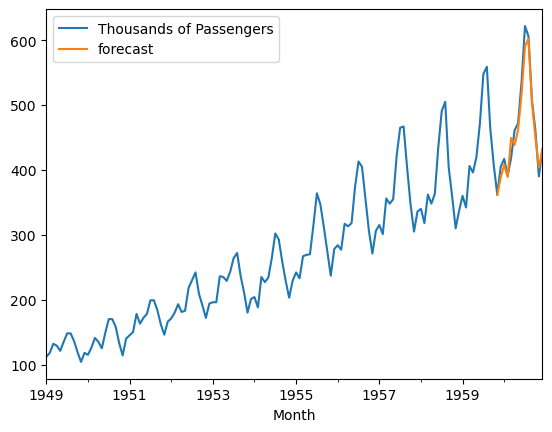

In [45]:
# validate whether my model is right or wrong

dataset['forecast'] = results.predict(start = 130, end = 144, dynamic = True)
dataset[['Thousands of Passengers', 'forecast']].plot()

In [46]:
dataset.tail()

,Thousands of Passengers,1st Diff,2nd Diff,seasonality,forecast
Month,,,,,
1960-08-01,606,-16.0,-103.0,47.0,602.189421
1960-09-01,508,-98.0,-82.0,45.0,503.349383
1960-10-01,461,-47.0,51.0,54.0,449.827224
1960-11-01,390,-71.0,-24.0,28.0,403.527894
1960-12-01,432,42.0,113.0,27.0,430.234704


In [47]:
# my time series model is obsolutely fine and we are ready to forecast the passengers value

from pandas.tseries.offsets import DateOffset

In [50]:
future_datse = [dataset.index[-1] + DateOffset(months=x) for x in range(0,61)]

In [51]:
future_datse

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [52]:
future_dates_df = pd.DataFrame(index =future_datse[1:], columns= dataset.columns)

In [54]:
future_dates_df.head()

,Thousands of Passengers,1st Diff,2nd Diff,seasonality,forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN


In [55]:
future_dates_df.tail()

,Thousands of Passengers,1st Diff,2nd Diff,seasonality,forecast
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN
1965-12-01,NaN,NaN,NaN,NaN,NaN


In [56]:
future_df = pd.concat([dataset, future_dates_df])

In [57]:
future_df.head()

,Thousands of Passengers,1st Diff,2nd Diff,seasonality,forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN


In [58]:
future_df.tail()

,Thousands of Passengers,1st Diff,2nd Diff,seasonality,forecast
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN
1965-12-01,NaN,NaN,NaN,NaN,NaN


C:\Users\PTC\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: >

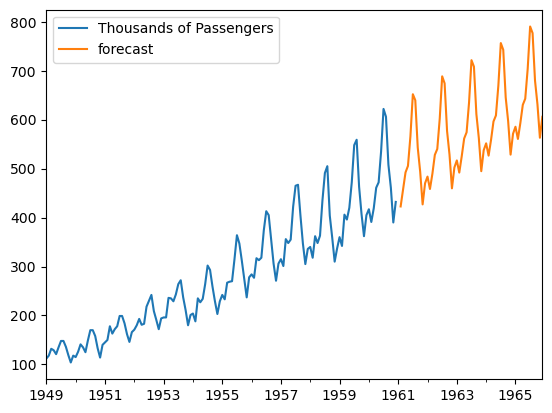

In [62]:
future_df['forecast'] = results.predict(start=145, end=203, dynamic=True)
future_df[['Thousands of Passengers', 'forecast']].plot()

In [63]:
future_df.tail(40)

,Thousands of Passengers,1st Diff,2nd Diff,seasonality,forecast
1962-09-01,NaN,NaN,NaN,NaN,576.877027
1962-10-01,NaN,NaN,NaN,NaN,528.818396
1962-11-01,NaN,NaN,NaN,NaN,459.730150
1962-12-01,NaN,NaN,NaN,NaN,502.273856
1963-01-01,NaN,NaN,NaN,NaN,516.743848
1963-02-01,NaN,NaN,NaN,NaN,491.870037
1963-03-01,NaN,NaN,NaN,NaN,525.112321
1963-04-01,NaN,NaN,NaN,NaN,561.528505
1963-05-01,NaN,NaN,NaN,NaN,574.247868
1963-06-01,NaN,NaN,NaN,NaN,635.073030


In [68]:
future_df1 = future_df.drop(['1st Diff', '2nd Diff', 'seasonality'], axis=1)

In [69]:
future_df1.tail()

,Thousands of Passengers,forecast
1965-08-01,NaN,776.859823
1965-09-01,NaN,679.826013
1965-10-01,NaN,631.244534
1965-11-01,NaN,563.100488
1965-12-01,NaN,605.912726


In [70]:
# save this file to csv 
future_df1.to_csv('future_forecasting.csv')